In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import copy
from skimage import metrics

path=r'D:/Study/Python/openCV/College/res/'

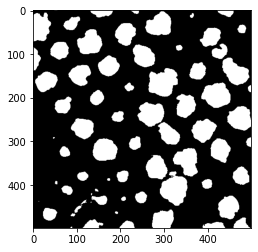

In [4]:
img = cv2.imread(path+'orig_image.png',0)
plt.imshow(img,'gray')

In [13]:
b=np.array([[255,255,255],[255,255,255],[255,255,255]],'uint8')
points_c=[[250,300]]

In [14]:
def dilation(img,b):
    dilat=np.zeros(img.shape,'uint8')
    pad=cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if np.sometrue(np.equal(pad[i:i+3,j:j+3],b)):
                dilat[i][j]=255
            else:
                dilat[i][j]=0
    return dilat

In [15]:
def conn_comp(img,points):
    x1=np.zeros(img.shape,'uint8')
    for i in points:
        x1[i[0]][i[1]]=255
    while(True):
        x=dilation(x1,b)&img
        if np.array_equal(x,x1):
            break
        x1=x.copy()
    return x

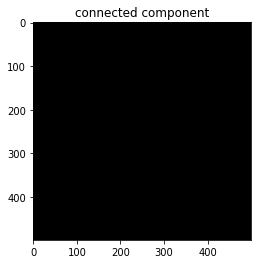

In [16]:
plt.title('connected component')
plt.imshow(conn_comp(img,points_c),'gray')